In [38]:
import pandas as pd
import numpy as np
import os
import sys
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore, f_oneway

In [4]:
benin_clean = pd.read_csv('../data/benin_clean.csv')
togo_clean = pd.read_csv('../data/togo_clean.csv')
ser_clean = pd.read_csv('../data/sierraleone_clean.csv')

In [9]:
benin = benin_clean[['GHI', 'DNI', 'DHI' ]]
togo = togo_clean[['GHI', 'DNI', 'DHI' ]]
ser = ser_clean[['GHI', 'DNI', 'DHI' ]]

In [11]:
ser

,GHI,DNI,DHI
0,0.0,0.0,0.0
1,0.0,0.0,0.0
2,0.0,0.0,0.0
3,0.0,0.0,0.0
4,0.0,0.0,0.0
...,...,...,...
504372,0.0,0.0,0.0
504373,0.0,0.0,0.0
504374,0.0,0.0,0.0
504375,0.0,0.0,0.0


In [12]:
# Add country column
benin['Country'] = 'Benin'
ser['Country'] = 'Sierra Leone'
togo['Country'] = 'Togo'

/tmp/ipykernel_9582/1307367779.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  benin['Country'] = 'Benin'
/tmp/ipykernel_9582/1307367779.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ser['Country'] = 'Sierra Leone'
/tmp/ipykernel_9582/1307367779.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexin

In [14]:
df = pd.concat([benin, togo, ser], ignore_index=True)

In [15]:
df

,GHI,DNI,DHI,Country
0,0.0,0.0,0.0,Benin
1,0.0,0.0,0.0,Benin
2,0.0,0.0,0.0,Benin
3,0.0,0.0,0.0,Benin
4,0.0,0.0,0.0,Benin
...,...,...,...,...
1538422,0.0,0.0,0.0,Sierra Leone
1538423,0.0,0.0,0.0,Sierra Leone
1538424,0.0,0.0,0.0,Sierra Leone
1538425,0.0,0.0,0.0,Sierra Leone


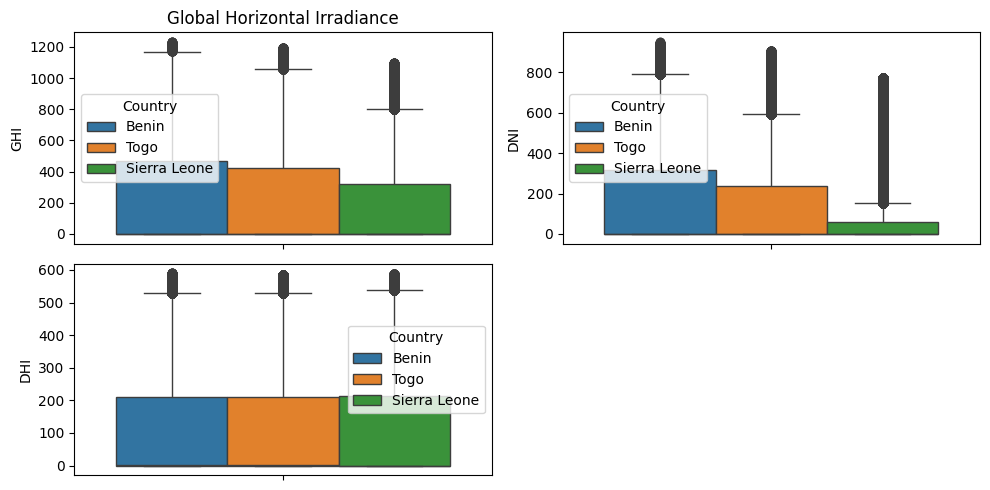

In [22]:
plt.figure(figsize=(10, 5))
plt.subplot(2, 2, 1)
sns.boxplot(y='GHI', data=df, hue='Country' )
plt.title('Global Horizontal Irradiance')
plt.subplot(2, 2, 2)
sns.boxplot(y='DNI', data=df, hue='Country' )
plt.subplot(2, 2, 3)
sns.boxplot(y='DHI', data=df, hue='Country' )
plt.tight_layout()
plt.savefig('../figures/boxplot.png', dpi=300)
plt.show()

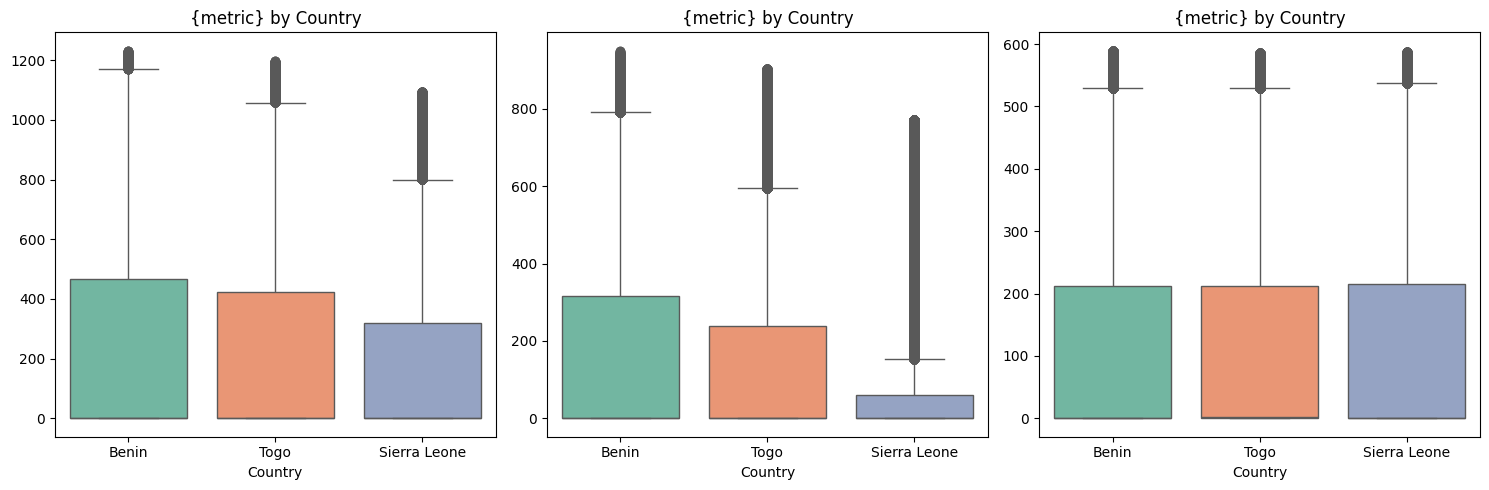

In [27]:
metrics = ['GHI', 'DNI', 'DHI']  # Replace with your metrics
n_metrics = len(metrics)

fig, axes = plt.subplots(1, n_metrics, figsize=(15, 5))

for ax, metric in zip(axes, metrics):
    sns.boxplot(data=df, y=metric, x='Country', hue='Country',
                palette='Set2', ax=ax, legend=False)
    ax.set_title('{metric} by Country')
    ax.set_ylabel('')

plt.tight_layout()
plt.show()

In [30]:
metric_summary =df.groupby('Country')[metrics].agg(
    ['mean', 'median','std']
)
metric_summary

GHI                            DNI                     \
                    mean median         std        mean median         std   
Country                                                                      
Benin         237.484571    0.6  327.168111  167.144091    0.0  261.940361   
Sierra Leone  183.226496    0.0  274.251477  100.756509    0.0  197.670532   
Togo          225.028731    0.5  316.449213  147.968936    0.0  247.676535   

                     DHI                     
                    mean median         std  
Country                                      
Benin         113.166760    0.4  151.660240  
Sierra Leone  109.313564    0.0  151.422763  
Togo          112.777219    1.5  151.567919

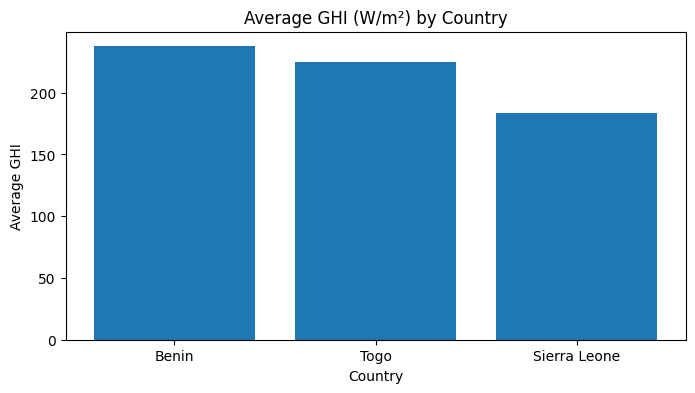

In [37]:
average_GHI = df.groupby('Country')['GHI'].mean().sort_values(ascending=False)
plt.figure(figsize=(8, 4))
plt.bar(average_GHI.index, average_GHI.values)
plt.title('Average GHI (W/m²) by Country')
plt.xlabel('Country')
plt.ylabel('Average GHI')
plt.savefig('../figures/average_GHI.png', dpi=300)
plt.show()

In [42]:
ghi_benin = benin['GHI']
ghi_togo = togo['GHI']
ghi_ser = ser['GHI']
# Perform ANOVA
p_value = f_oneway(ghi_benin, ghi_togo, ghi_ser).pvalue
print(f"p-value: {p_value}")
# Perform post-hoc test if ANOVA is significant
if p_value < 0.05:
    print("Significant differences found.")
else:
    print("No significant differences found.")

p-value: 0.0
Significant differences found.


### Key Observations

- **Benin** exhibits the highest **average and median GHI**, making it a promising candidate for solar projects.
- **Togo** shows relatively **low variability in GHI**, which could mean more stable solar yield.
- **Sierra Leone** has **lower mean GHI** but a **higher spread**, indicating inconsistency in solar potential across locations or times.
